In [597]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np


### Which Patient Type in Location 10 brought the Most revenue in 2019?

In [598]:
# reading data, minor cleaning
df = pd.read_csv('ThoseWhoCareData.csv')
#df.head()
df['charge DOS']= pd.to_datetime(df['charge DOS'], format='%m/%d/%Y')
df.info()
df['Location'].value_counts()
# where patient type = 0, replace with cpt type (checked in Excel to make sure the codes matched)
df[df['Patient Type'] == '0']
df['Patient Type'] = np.where(df['Patient Type'] == '0', df['Cpt Type'], df['Patient Type'])
df[df['Cpt Type'] == '0']
df['Cpt Type'] = np.where(df['Cpt Type'] == '0', 'Beovu', df['Cpt Type'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Person Number     10320 non-null  int64         
 1   charge DOS        10320 non-null  datetime64[ns]
 2   Contract          10320 non-null  object        
 3   COB1              10320 non-null  object        
 4   Location          10320 non-null  object        
 5   Physician         10320 non-null  object        
 6   Patient Age       10320 non-null  int64         
 7   Cpt Type          10320 non-null  object        
 8   Co-Payment        10320 non-null  int64         
 9   Encounter Number  10320 non-null  int64         
 10  Patient Type      10320 non-null  object        
 11  Patient Zip Code  10121 non-null  float64       
 12  Patient Gender    10320 non-null  object        
 13  CPT               10320 non-null  object        
 14  Revenue           1032

In [599]:
#filter data frame down to location 10
location_ten = df.loc[df['Location'] == 'Location 10']
#filter data to the year 2019
filt = (location_ten['charge DOS'] > pd.to_datetime('2018-12-31')) & (location_ten['charge DOS'] < pd.to_datetime('2020-01-01'))
location_ten = location_ten.loc[filt]
# Show the total revenue by patient type
location_ten.groupby(location_ten['Patient Type']).Revenue.sum()

Patient Type
Diagnostic Test         762.132
Office Procedure        729.652
Office Visit          11806.606
Other                     0.000
Post Op                 243.558
Post Op 1 Day             0.000
Retinal Injections    58951.410
Visual Field            157.416
Name: Revenue, dtype: float64

### Which location saw the biggest increase in total patient volume %? what %?  (1/1/2020-3/16/2020  vs 3/17/2020-6/30/2020)

In [600]:
df.head()
#first date range
filt1 = (df['charge DOS'] >= pd.to_datetime('2020-01-01')) & (df['charge DOS'] <= pd.to_datetime('2020-03-16'))
#second date range
filt2 = (df['charge DOS'] >= pd.to_datetime('2020-03-17')) & (df['charge DOS'] <= pd.to_datetime('2020-06-30'))
# create a data set with first date range filter
first_date_range = df.loc[filt1]
#how many unique patients per day
first = first_date_range.groupby(['Location', 'charge DOS']).agg({'Person Number': 'nunique'})
print(first)
first = first.groupby('Location')['Person Number'].sum().rename('Total_Patients_1')
first



                        Person Number
Location    charge DOS               
Location 10 2020-01-08              1
            2020-01-22              2
            2020-01-28              2
            2020-02-05              1
            2020-02-14              1
...                               ...
Location 8  2020-01-15              2
            2020-01-29              1
            2020-03-02              1
            2020-03-03              1
            2020-03-04              1

[132 rows x 1 columns]


Location
Location 10     13
Location 14      9
Location 18     21
Location 23     13
Location 29      3
Location 31     14
Location 35     19
Location 4     105
Location 44      1
Location 45      1
Location 6      30
Location 8       6
Name: Total_Patients_1, dtype: int64

In [601]:
second_date_range = df.loc[filt2]        
second = second_date_range.groupby(['Location', 'charge DOS']).agg({'Person Number': 'nunique'})
second = second.groupby('Location')['Person Number'].sum().rename('Total_Patients_2')
second

Location
Location 10    13
Location 14     9
Location 18    32
Location 23    18
Location 29     1
Location 31    18
Location 35    12
Location 4     96
Location 44     1
Location 6     39
Location 8     13
Name: Total_Patients_2, dtype: int64

In [602]:
change = pd.concat([first, second], axis=1)
change.fillna(0, inplace=True)
change['percent_increase'] = change.pct_change(axis=1)['Total_Patients_2']
change.sort_values(by=['percent_increase'], ascending=False, inplace=True)
change

,Total_Patients_1,Total_Patients_2,percent_increase
Location,,,
Location 8,6,13.0,1.166667
Location 18,21,32.0,0.523810
Location 23,13,18.0,0.384615
Location 6,30,39.0,0.300000
Location 31,14,18.0,0.285714
Location 10,13,13.0,0.000000
Location 14,9,9.0,0.000000
Location 44,1,1.0,0.000000
Location 4,105,96.0,-0.085714


In [603]:

'''
#how many unique Encounter Numbers per day

#first date range
filt1 = (df['charge DOS'] >= pd.to_datetime('2020-01-01')) & (df['charge DOS'] <= pd.to_datetime('2020-03-16'))
#second date range
filt2 = (df['charge DOS'] >= pd.to_datetime('2020-03-17')) & (df['charge DOS'] <= pd.to_datetime('2020-06-30'))
first_date_range = df.loc[filt1]
first = first_date_range.groupby(['Location', 'charge DOS']).agg({'Encounter Number': 'nunique'})
first = first.groupby('Location')['Encounter Number'].sum().rename('Total_Patients_1')
second_date_range = df.loc[filt2]        
second = second_date_range.groupby(['Location', 'charge DOS']).agg({'Encounter Number': 'nunique'})
second = second.groupby('Location')['Encounter Number'].sum().rename('Total_Patients_2')
change = pd.concat([first, second], axis=1)
change.fillna(0, inplace=True)
change['percent_increase'] = change.pct_change(axis=1)['Total_Patients_2']
change.sort_values(by=['percent_increase'], ascending=False, inplace=True)
change

'''

"\n#how many unique Encounter Numbers per day\n\n#first date range\nfilt1 = (df['charge DOS'] >= pd.to_datetime('2020-01-01')) & (df['charge DOS'] <= pd.to_datetime('2020-03-16'))\n#second date range\nfilt2 = (df['charge DOS'] >= pd.to_datetime('2020-03-17')) & (df['charge DOS'] <= pd.to_datetime('2020-06-30'))\nfirst_date_range = df.loc[filt1]\nfirst = first_date_range.groupby(['Location', 'charge DOS']).agg({'Encounter Number': 'nunique'})\nfirst = first.groupby('Location')['Encounter Number'].sum().rename('Total_Patients_1')\nsecond_date_range = df.loc[filt2]        \nsecond = second_date_range.groupby(['Location', 'charge DOS']).agg({'Encounter Number': 'nunique'})\nsecond = second.groupby('Location')['Encounter Number'].sum().rename('Total_Patients_2')\nchange = pd.concat([first, second], axis=1)\nchange.fillna(0, inplace=True)\nchange['percent_increase'] = change.pct_change(axis=1)['Total_Patients_2']\nchange.sort_values(by=['percent_increase'], ascending=False, inplace=True)\nch

### Do females or males bring in more revenue/patient?

In [604]:
df['Patient Gender'].value_counts()

M    6514
F    3772
0      34
Name: Patient Gender, dtype: int64

In [605]:
revenue_by_gender = df.groupby(['Patient Gender'])['Revenue'].sum()
revenue_by_gender = revenue_by_gender/df['Patient Gender'].value_counts()
revenue_by_gender

0     58.322965
F    351.142907
M    248.437188
dtype: float64

### What is the cost/patient of our most costly patient type? Which patient type?


In [626]:
df4 = df[['Cpt Type', 'Patient Type', 'CPT', 'Revenue']]
df4.rename(columns={'CPT': 'Service Item Id'}, inplace=True)
cpt_info = pd.read_csv('ThoseWhoCareCPTInfo.csv')
#drop extra Beovu_Delv entry and Cataract Surgery Entry. They are duplicates in data
cpt_info.drop(cpt_info.index[120], inplace=True)
cpt_info.drop(cpt_info.index[94], inplace=True)
cpt_info['Service Item Id'].value_counts(sort=True)
new_df = df4.merge(cpt_info, how='left', left_on=['Service Item Id'], right_on=['Service Item Id'])
new_df


C:\Users\ryanb\AppData\Local\Temp\ipykernel_19272\2465670627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.rename(columns={'CPT': 'Service Item Id'}, inplace=True)


,Cpt Type_x,Patient Type,Service Item Id,Revenue,Code Desc,Cpt Type_y,Medicare Allowable
0,Lucentis,Retinal Injections,LUCEN_DELV,1823.640000,Lucentis Delive,Lucentis,0.000000
1,Eylea,Retinal Injections,EYLEA_DELV,2447.550000,Eylea Delivered,Eylea,0.000000
2,Other,Office Visit,Walk Out,0.000000,Walk Out Not Se,Other,0.000000
3,Other,Retinal Injections,Walk Out,0.000000,Walk Out Not Se,Other,0.000000
4,Other,Office Visit,Walk Out,0.000000,Walk Out Not Se,Other,0.000000
...,...,...,...,...,...,...,...
10315,Office Code,Office Visit,2022F,0.000000,DilatedRetinl E,Office Code,0.000000
10316,Office Code,Office Visit,92014,185.560742,Ophth Serv: Med,Office Code,132.543387
10317,Other,Office Visit,92202,23.675211,Ophthalmoscopy,Other,16.910865
10318,OCT,Office Visit,92133,55.332430,Scan Computeriz,OCT,39.523165


In [607]:
cost_as_percent_df = pd.read_csv('ThoseWhoCareCostas%ofMCAorRev.csv')
full_data = new_df.merge(cost_as_percent_df, how='left', left_on=['Cpt Type_x'], right_on=['Cpt Type'])
full_data

,Cpt Type_x,Patient Type,Service Item Id,Revenue,Code Desc,Cpt Type_y,Medicare Allowable,Cpt Type,% of MCA,% of Revenue
0,Lucentis,Retinal Injections,LUCEN_DELV,1823.640000,Lucentis Delive,Lucentis,0.000000,Lucentis,65%,90%
1,Eylea,Retinal Injections,EYLEA_DELV,2447.550000,Eylea Delivered,Eylea,0.000000,Eylea,65%,90%
2,Other,Office Visit,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,65%,90%
3,Other,Retinal Injections,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,65%,90%
4,Other,Office Visit,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,65%,90%
...,...,...,...,...,...,...,...,...,...,...
10315,Office Code,Office Visit,2022F,0.000000,DilatedRetinl E,Office Code,0.000000,Office Code,75%,90%
10316,Office Code,Office Visit,92014,185.560742,Ophth Serv: Med,Office Code,132.543387,Office Code,75%,90%
10317,Other,Office Visit,92202,23.675211,Ophthalmoscopy,Other,16.910865,Other,65%,90%
10318,OCT,Office Visit,92133,55.332430,Scan Computeriz,OCT,39.523165,OCT,65%,90%


In [608]:
# change percentage column to decimals
full_data['% of MCA'] = full_data['% of MCA'].str.rstrip('%').astype('float') / 100
full_data['% of Revenue'] = full_data['% of Revenue'].str.rstrip('%').astype('float') / 100
full_data


,Cpt Type_x,Patient Type,Service Item Id,Revenue,Code Desc,Cpt Type_y,Medicare Allowable,Cpt Type,% of MCA,% of Revenue
0,Lucentis,Retinal Injections,LUCEN_DELV,1823.640000,Lucentis Delive,Lucentis,0.000000,Lucentis,0.65,0.9
1,Eylea,Retinal Injections,EYLEA_DELV,2447.550000,Eylea Delivered,Eylea,0.000000,Eylea,0.65,0.9
2,Other,Office Visit,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,0.65,0.9
3,Other,Retinal Injections,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,0.65,0.9
4,Other,Office Visit,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,0.65,0.9
...,...,...,...,...,...,...,...,...,...,...
10315,Office Code,Office Visit,2022F,0.000000,DilatedRetinl E,Office Code,0.000000,Office Code,0.75,0.9
10316,Office Code,Office Visit,92014,185.560742,Ophth Serv: Med,Office Code,132.543387,Office Code,0.75,0.9
10317,Other,Office Visit,92202,23.675211,Ophthalmoscopy,Other,16.910865,Other,0.65,0.9
10318,OCT,Office Visit,92133,55.332430,Scan Computeriz,OCT,39.523165,OCT,0.65,0.9


In [609]:
# create cost column
full_data['Cost'] = full_data.apply(lambda x : x['% of MCA'] * x['Medicare Allowable'] if x['Medicare Allowable'] > 0 else 0, axis=1)
full_data['Cost'] = full_data.apply(lambda x : x['% of Revenue'] * x['Revenue'] if x['Cost'] == 0 else x['Cost'], axis=1)
full_data

,Cpt Type_x,Patient Type,Service Item Id,Revenue,Code Desc,Cpt Type_y,Medicare Allowable,Cpt Type,% of MCA,% of Revenue,Cost
0,Lucentis,Retinal Injections,LUCEN_DELV,1823.640000,Lucentis Delive,Lucentis,0.000000,Lucentis,0.65,0.9,1641.276000
1,Eylea,Retinal Injections,EYLEA_DELV,2447.550000,Eylea Delivered,Eylea,0.000000,Eylea,0.65,0.9,2202.795000
2,Other,Office Visit,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,0.65,0.9,0.000000
3,Other,Retinal Injections,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,0.65,0.9,0.000000
4,Other,Office Visit,Walk Out,0.000000,Walk Out Not Se,Other,0.000000,Other,0.65,0.9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10315,Office Code,Office Visit,2022F,0.000000,DilatedRetinl E,Office Code,0.000000,Office Code,0.75,0.9,0.000000
10316,Office Code,Office Visit,92014,185.560742,Ophth Serv: Med,Office Code,132.543387,Office Code,0.75,0.9,99.407540
10317,Other,Office Visit,92202,23.675211,Ophthalmoscopy,Other,16.910865,Other,0.65,0.9,10.992062
10318,OCT,Office Visit,92133,55.332430,Scan Computeriz,OCT,39.523165,OCT,0.65,0.9,25.690057


In [610]:
# Mislabeled Patient Types? Beovu is entered as Retinal Injections. 
# How I Resolved- Went back to original Data Set and realized I needed to do more data cleaning. 
# Removed all 0's and replaced them with the proper code description 
full_data[full_data.isna().any(axis=1)]
# full_data['Patient Type'].value_counts()
# full_data['Cpt Type_x'].equals(full_data['Cpt Type'])
# full_data['Cpt Type_y'].equals(full_data['Cpt Type_x'])
# full_data['diff'] = np.where(full_data['Cpt Type'] == full_data['Cpt Type_y'], 1, 0)
#full_data.loc[full_data['diff'] == 0]

,Cpt Type_x,Patient Type,Service Item Id,Revenue,Code Desc,Cpt Type_y,Medicare Allowable,Cpt Type,% of MCA,% of Revenue,Cost


In [611]:
billable_patients = full_data[full_data['Cost'] > 0]
# Decided not to use billable patients, although something to consider.
# billable_patients['Patient Type'].value_counts()
cost_per_patient_type = full_data.groupby(['Patient Type']).agg({'Cost': 'mean'})
cost_per_patient_type.sort_values(by=['Cost'], ascending=False, inplace=True)
cost_per_patient_type

,Cost
Patient Type,
Eylea,2202.795000
Surgery,640.400335
Yag Laser Office,384.936462
Retinal Injections,287.778870
Retinal Procedures,246.144913
Retinal Lasers,242.299021
Yag Laser,203.647150
Yag Laser ASC,195.897498
Office Procedure,194.371950


### Which Physician was the most profitable on a per patient basis? What profit?

In [630]:
# join original data with Cost data from previous question
physician_df = df.join(full_data[['Cost']])
physician_df['Profit'] = (physician_df['Revenue'] - physician_df['Cost']).round(2)
physician_df

,Person Number,charge DOS,Contract,COB1,Location,Physician,Patient Age,Cpt Type,Co-Payment,Encounter Number,Patient Type,Patient Zip Code,Patient Gender,CPT,Revenue,Primary Key,Cost,Profit
0,21913,2020-01-06,Contract 1,COB1 4,Location 4,Physician 4,73,Lucentis,0,5,Retinal Injections,90011.0,M,LUCEN_DELV,1823.640000,Contract 1COB1 4,1641.276000,182.36
1,11093,2020-01-02,Contract 1,COB1 6,Location 6,Physician 7,80,Eylea,0,15,Retinal Injections,90044.0,M,EYLEA_DELV,2447.550000,Contract 1COB1 6,2202.795000,244.76
2,23853,2018-09-07,Contract 5,COB1 9,Location 8,Physician 10,53,Other,0,24,Office Visit,90026.0,F,Walk Out,0.000000,Contract 5COB1 9,0.000000,0.00
3,20696,2018-07-25,Contract 5,COB1 9,Location 10,Physician 12,59,Other,0,30,Retinal Injections,90022.0,F,Walk Out,0.000000,Contract 5COB1 9,0.000000,0.00
4,23853,2018-09-26,Contract 5,COB1 9,Location 14,Physician 13,53,Other,0,36,Office Visit,90026.0,F,Walk Out,0.000000,Contract 5COB1 9,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,1667,2020-08-25,Contract 77,COB1 139,Location 35,Physician 4,59,Office Code,0,34568,Office Visit,90043.0,F,2022F,0.000000,Contract 77COB1 139,0.000000,0.00
10316,1667,2020-08-25,Contract 77,COB1 139,Location 35,Physician 4,59,Office Code,0,34568,Office Visit,90043.0,F,92014,185.560742,Contract 77COB1 139,99.407540,86.15
10317,1667,2020-08-25,Contract 77,COB1 139,Location 35,Physician 4,59,Other,0,34568,Office Visit,90043.0,F,92202,23.675211,Contract 77COB1 139,10.992062,12.68
10318,8983,2020-06-09,Contract 35,COB1 63,Location 4,Physician 58,82,OCT,0,34574,Office Visit,NaN,F,92133,55.332430,Contract 35COB1 63,25.690057,29.64


In [631]:
billable_patients = physician_df[physician_df['Profit'] > 0]
physician_profit_per_patient = physician_df.groupby(['Physician']).agg({'Profit': 'mean'})
physician_profit_per_patient.sort_values(by=['Profit'], ascending=False, inplace=True)
physician_profit_per_patient

,Profit
Physician,
Physician 48,140.729347
Physician 41,136.268472
Physician 19,128.678083
Physician 15,124.621579
Physician 27,110.323774
Physician 43,108.247000
Physician 14,102.628449
Physician 12,76.244889
Physician 4,75.265645


### Which doctor saw the highest volume of unique Medicare Patients


In [632]:
contract_info = pd.read_csv('ThoseWhoCareContractInfo.csv')
contract_info = contract_info[['LOB', 'Primary Key', 'Countif']]
df['Primary Key'] = df['Contract'] + df['COB1']
contract_info = contract_info.drop_duplicates(subset='Primary Key')
medicare_patients_df = df.merge(contract_info, how='left', left_on=['Primary Key'], right_on=['Primary Key'])
medicare_patients_df

,Person Number,charge DOS,Contract,COB1,Location,Physician,Patient Age,Cpt Type,Co-Payment,Encounter Number,Patient Type,Patient Zip Code,Patient Gender,CPT,Revenue,Primary Key,LOB,Countif
0,21913,2020-01-06,Contract 1,COB1 4,Location 4,Physician 4,73,Lucentis,0,5,Retinal Injections,90011.0,M,LUCEN_DELV,1823.640000,Contract 1COB1 4,Medicare,1
1,11093,2020-01-02,Contract 1,COB1 6,Location 6,Physician 7,80,Eylea,0,15,Retinal Injections,90044.0,M,EYLEA_DELV,2447.550000,Contract 1COB1 6,Medicare,1
2,23853,2018-09-07,Contract 5,COB1 9,Location 8,Physician 10,53,Other,0,24,Office Visit,90026.0,F,Walk Out,0.000000,Contract 5COB1 9,Commercial,1
3,20696,2018-07-25,Contract 5,COB1 9,Location 10,Physician 12,59,Other,0,30,Retinal Injections,90022.0,F,Walk Out,0.000000,Contract 5COB1 9,Commercial,1
4,23853,2018-09-26,Contract 5,COB1 9,Location 14,Physician 13,53,Other,0,36,Office Visit,90026.0,F,Walk Out,0.000000,Contract 5COB1 9,Commercial,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,1667,2020-08-25,Contract 77,COB1 139,Location 35,Physician 4,59,Office Code,0,34568,Office Visit,90043.0,F,2022F,0.000000,Contract 77COB1 139,Commercial,1
10316,1667,2020-08-25,Contract 77,COB1 139,Location 35,Physician 4,59,Office Code,0,34568,Office Visit,90043.0,F,92014,185.560742,Contract 77COB1 139,Commercial,1
10317,1667,2020-08-25,Contract 77,COB1 139,Location 35,Physician 4,59,Other,0,34568,Office Visit,90043.0,F,92202,23.675211,Contract 77COB1 139,Commercial,1
10318,8983,2020-06-09,Contract 35,COB1 63,Location 4,Physician 58,82,OCT,0,34574,Office Visit,NaN,F,92133,55.332430,Contract 35COB1 63,Medicare,1


In [633]:
physician_unique = medicare_patients_df[medicare_patients_df['LOB'] == 'Medicare']
physician_unique
physician_unique_medicare_patients = physician_unique.groupby(['Physician']).agg({'Primary Key': 'nunique'})
physician_unique_medicare_patients.sort_values(by=['Primary Key'], ascending=False, inplace=True)
physician_unique_medicare_patients

,Primary Key
Physician,
Physician 4,36
Physician 14,34
Physician 18,22
Physician 27,16
Physician 16,15
Physician 29,14
Physician 13,12
Physician 48,12
Physician 19,12


### What is the average age of a female Glaucoma & Glaucoma Laser patient in 2019?

In [634]:
glaucoma_df = df[['Patient Age', 'Patient Type', 'Patient Gender']]
glaucoma_df = glaucoma_df.join(full_data[['Cpt Type']])
glaucoma_df = glaucoma_df.loc[(glaucoma_df['Cpt Type'] == 'Glaucoma') | (glaucoma_df['Cpt Type'] == 'Glaucoma Laser')]
glaucoma_df.groupby(['Patient Gender']).agg({'Patient Age': 'mean'})


,Patient Age
Patient Gender,
F,74.962963
M,73.416667


### Which patient type drives the most revenue/encounter and profit/encounter? What was Revenue by Encounter/ Profit/Encounter?

In [635]:
patient_type_profit = physician_df.groupby(['Patient Type']).agg({'Revenue': 'mean', 'Profit' : 'mean'})
patient_type_profit.sort_values(by=['Profit'], ascending=False, inplace=True)
patient_type_profit

,Revenue,Profit
Patient Type,,
Surgery,1202.800956,562.400742
Yag Laser,502.127880,298.481818
Yag Laser ASC,491.106215,295.205714
Retinal Lasers,525.580628,283.281296
Office Procedure,446.425455,252.054333
Eylea,2447.550000,244.760000
Other,298.368474,159.760000
Anesthesia,205.323881,140.650894
SLT Laser Office,208.670000,128.730000


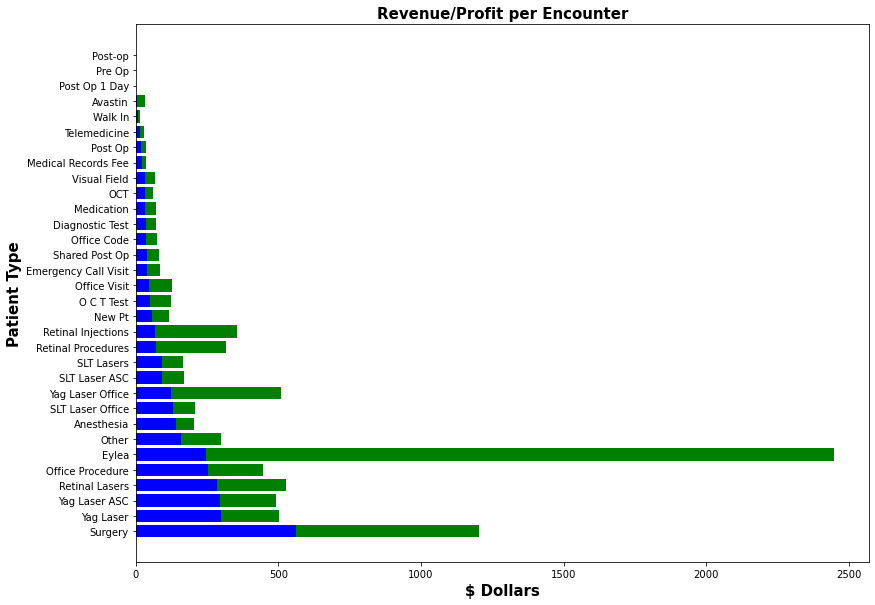

In [618]:
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
revenue = patient_type_profit['Revenue']
profit = patient_type_profit['Profit']
patient_type = patient_type_profit.index


 
# Make the plot
plt.barh(patient_type, revenue,  color ='g')
plt.barh(patient_type, profit, color ='b')
plt.tight_layout()
 
# Adding Xticks
plt.title('Revenue/Profit per Encounter', fontweight ='bold', fontsize = 15)
plt.ylabel('Patient Type', fontweight ='bold', fontsize = 15)
plt.xlabel('$ Dollars', fontweight ='bold', fontsize = 15)
plt.show()

### Which contract type is most profitable per patient/what profit?

In [619]:
physician_df['Primary Key'] = physician_df['Contract'] + physician_df['COB1']
physician_df['unique_id'] = physician_df.index
physician_df.head()

,Person Number,charge DOS,Contract,COB1,Location,Physician,Patient Age,Cpt Type,Co-Payment,Encounter Number,Patient Type,Patient Zip Code,Patient Gender,CPT,Revenue,Cost,Profit,Primary Key,unique_id
0,21913,2020-01-06,Contract 1,COB1 4,Location 4,Physician 4,73,Lucentis,0,5,Retinal Injections,90011.0,M,LUCEN_DELV,1823.64,1641.276,182.364,Contract 1COB1 4,0
1,11093,2020-01-02,Contract 1,COB1 6,Location 6,Physician 7,80,Eylea,0,15,Retinal Injections,90044.0,M,EYLEA_DELV,2447.55,2202.795,244.755,Contract 1COB1 6,1
2,23853,2018-09-07,Contract 5,COB1 9,Location 8,Physician 10,53,Other,0,24,Office Visit,90026.0,F,Walk Out,0.00,0.000,0.000,Contract 5COB1 9,2
3,20696,2018-07-25,Contract 5,COB1 9,Location 10,Physician 12,59,Other,0,30,Retinal Injections,90022.0,F,Walk Out,0.00,0.000,0.000,Contract 5COB1 9,3
4,23853,2018-09-26,Contract 5,COB1 9,Location 14,Physician 13,53,Other,0,36,Office Visit,90026.0,F,Walk Out,0.00,0.000,0.000,Contract 5COB1 9,4


In [620]:
contract_info = pd.read_csv('ThoseWhoCareContractInfo.csv')
contract_info = contract_info[['Fin Class','LOB', 'Primary Key']]
contract_info['key_and_class'] = contract_info['Primary Key'] + ' ' + contract_info['Fin Class']
contract_type_profit = physician_df.merge(contract_info, how='left', left_on=['Primary Key'], right_on=['Primary Key'])
contract_type_profit = contract_type_profit[['Person Number', 'charge DOS', 'Revenue', 'Profit', 'LOB', 'unique_id']]
contract_type_profit = contract_type_profit.drop_duplicates(subset=['unique_id'], keep='first')
contract_type_profit = contract_type_profit.sort_values(by=['unique_id']).reset_index(drop=True)
contract_type_profit



,Person Number,charge DOS,Revenue,Profit,LOB,unique_id
0,21913,2020-01-06,1823.640000,182.364000,Medicare,0
1,11093,2020-01-02,2447.550000,244.755000,Medicare,1
2,23853,2018-09-07,0.000000,0.000000,Commercial,2
3,20696,2018-07-25,0.000000,0.000000,Commercial,3
4,23853,2018-09-26,0.000000,0.000000,Commercial,4
...,...,...,...,...,...,...
10315,1667,2020-08-25,0.000000,0.000000,Commercial,10315
10316,1667,2020-08-25,185.560742,86.153201,Commercial,10316
10317,1667,2020-08-25,23.675211,12.683149,Commercial,10317
10318,8983,2020-06-09,55.332430,29.642373,Medicare,10318


In [621]:
profit_by_lob = contract_type_profit.groupby(['Person Number', 'LOB'], as_index=False).agg({'Profit' : 'sum'})
profit_by_lob = profit_by_lob[profit_by_lob['Profit'] != 0]
profit_by_lob = profit_by_lob.groupby(['LOB']).agg({'Profit' : 'mean'})
profit_by_lob

,Profit
LOB,
Commercial,4815.905193
Medicaid,6824.231188
Medicare,8881.881688


### What is the total profit on FFS patients?

In [622]:
contract_info = pd.read_csv('ThoseWhoCareContractInfo.csv')
contract_info = contract_info[['Fin Class','LOB', 'Primary Key']]
contract_info['key_and_class'] = contract_info['Primary Key'] + ' ' + contract_info['Fin Class']
physician_df['unique_id'] = physician_df.index
FFS_patients = contract_info.merge(physician_df, how='left', left_on=['Primary Key'], right_on=['Primary Key'])
FFS_patients = FFS_patients.drop_duplicates(subset=['unique_id'], keep='first')
FFS_patients.drop('Patient Zip Code', axis=1, inplace=True)
FFS_patients = FFS_patients[['Fin Class', 'LOB', 'Primary Key', 'key_and_class', 'Person Number', 'charge DOS','CPT', 'Revenue', 'Profit', 'unique_id']]
FFS_patients = FFS_patients.sort_values(by=['unique_id']).reset_index(drop=True)
FFS_patients

# These are the various checks I did on the data to make sure it was right.
# FFS_patients['unique_id'].nunique()
# FFS_patients['fin_class_check']= FFS_patients['key_and_class'].str.split(n=0, expand=False).str[3]
# FFS_patients['diff'] = np.where(FFS_patients['Fin Class'] == FFS_patients['fin_class_check'], 1, 0)
# FFS_patients.loc[FFS_patients['diff'] == 0]
# FFS_patients['key_and_class_check'] = FFS_patients['Primary Key'] + ' '+ FFS_patients['Fin Class']
# FFS_patients['key_and_class_check'].nunique()
# FFS_patients['key_and_class'].equals(FFS_patients['key_and_class_check'])
# null_col = FFS_patients[FFS_patients.isna().any(axis=1)]
# null_col

,Fin Class,LOB,Primary Key,key_and_class,Person Number,charge DOS,CPT,Revenue,Profit,unique_id
0,FFS,Medicare,Contract 1COB1 4,Contract 1COB1 4 FFS,21913,2020-01-06,LUCEN_DELV,1823.640000,182.364000,0
1,FFS,Medicare,Contract 1COB1 6,Contract 1COB1 6 FFS,11093,2020-01-02,EYLEA_DELV,2447.550000,244.755000,1
2,Self-Pay,Commercial,Contract 5COB1 9,Contract 5COB1 9 Self-Pay,23853,2018-09-07,Walk Out,0.000000,0.000000,2
3,Self-Pay,Commercial,Contract 5COB1 9,Contract 5COB1 9 Self-Pay,20696,2018-07-25,Walk Out,0.000000,0.000000,3
4,Self-Pay,Commercial,Contract 5COB1 9,Contract 5COB1 9 Self-Pay,23853,2018-09-26,Walk Out,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...,...
10315,CAP,Commercial,Contract 77COB1 139,Contract 77COB1 139 CAP,1667,2020-08-25,2022F,0.000000,0.000000,10315
10316,CAP,Commercial,Contract 77COB1 139,Contract 77COB1 139 CAP,1667,2020-08-25,92014,185.560742,86.153201,10316
10317,CAP,Commercial,Contract 77COB1 139,Contract 77COB1 139 CAP,1667,2020-08-25,92202,23.675211,12.683149,10317
10318,CAP,Medicare,Contract 35COB1 63,Contract 35COB1 63 CAP,8983,2020-06-09,92133,55.332430,29.642373,10318


In [623]:
total_profit_ffs = FFS_patients.groupby(['Fin Class']).agg({'Profit' : 'sum'})
total_profit_ffs

,Profit
Fin Class,
CAP,364713.146747
FFS,456253.655144
Self-Pay,951.507753
